In [29]:
import pandas as pd
from pathlib import Path
from datetime import datetime

In [57]:
netflix_pd = pd.read_csv(f"{Path().absolute()}/netflix_titles.csv",
                         parse_dates=['date_added'],
                         date_format='%B %d, %Y')

# It's required to use str.strip() because some of the values
# have a whitespace at the beginning
netflix_pd['date_added'] = pd.to_datetime(netflix_pd['date_added'].str.strip(), format='%B %d, %Y')

netflix_pd.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [119]:
netflix_pd.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


How many titles where added by year

In [63]:
# Adds a new columns with the year to facilitate the aggregation
netflix_pd['date_added_year'] = netflix_pd['date_added'].dt.year.astype('Int64')
netflix_pd.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021


In [131]:
# Passing as_index=False replace the requirement of calling reset_index
titles_released_by_year = netflix_pd.groupby('date_added_year', as_index=False)['show_id'].count()
titles_released_by_year.dtypes

date_added_year    Int64
show_id            int64
dtype: object

In [65]:
netflix_pd[netflix_pd['date_added_year']==2012].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
5941,s5942,Movie,Being Elmo: A Puppeteer's Journey,Constance Marks,"Kevin Clash, Whoopi Goldberg",United States,2012-02-21,2011,PG,76 min,Documentaries,Whoopi Goldberg narrates Elmo creator Kevin Cl...,2012
6425,s6426,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",2012-11-14,2012,R,84 min,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...,2012
7241,s7242,Movie,Kung Fu Panda: Holiday,Tim Johnson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ja...",United States,2012-12-01,2010,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po...",2012


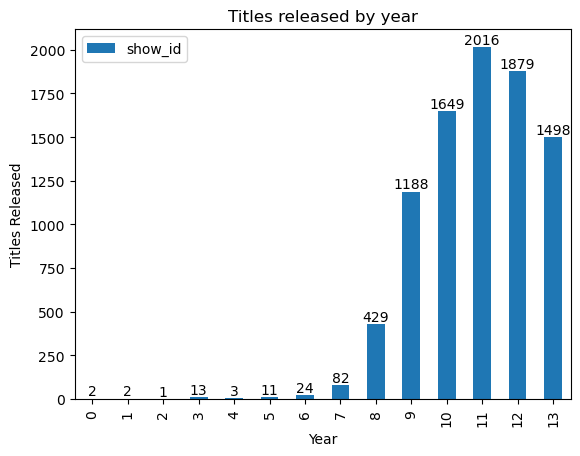

In [117]:
import matplotlib.pyplot as plt

chart = titles_released_by_year[['show_id']].plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Titles Released')
plt.title('Titles released by year')
# plt.gca().invert_yaxis()

for i, val in enumerate(titles_released_by_year['show_id']):
    chart.text(i, val + 0.5, str(val), ha='center', va='bottom')
    
plt.show()

What is the accumulated average titles released over years?

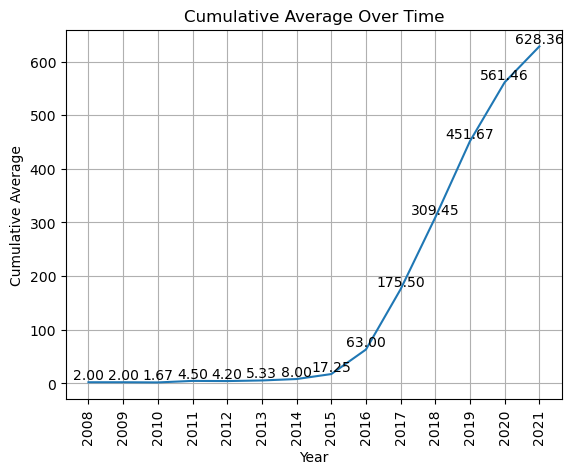

In [178]:
import matplotlib.pyplot as plt

# Calculate the accumulated average
titles_released_by_year['acc_average'] = titles_released_by_year['show_id'].cumsum() / (titles_released_by_year.index + 1)

# Plot the results
plt.plot(titles_released_by_year['date_added_year'], titles_released_by_year['acc_average'])
plt.xlabel('Year')
plt.ylabel('Cumulative Average')
plt.title('Cumulative Average Over Time')
plt.xticks(titles_released_by_year['date_added_year'].astype(int), rotation=90)
plt.grid(True)

for i, txt in enumerate(titles_released_by_year['acc_average']):
    plt.text(titles_released_by_year['date_added_year'][i], titles_released_by_year['acc_average'][i], f'{txt:.2f}', ha='center', va='bottom')

plt.show()

In [140]:
titles_released_by_year.head()

,date_added_year,show_id,acc_average
0,2008,2,2.000000
1,2009,2,2.000000
2,2010,1,1.666667
3,2011,13,4.500000
4,2012,3,4.200000
